In [2]:
#Import the required modules
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

In [3]:
#Loading the data file.
df = json.load((open('ultimate_data_challenge.json')))

In [4]:
#Converting the data file into a Pandas dataframe
data = pd.DataFrame(df)

In [5]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


Next, let us plot the distribution of the surge percent.

/home/streetraider92/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


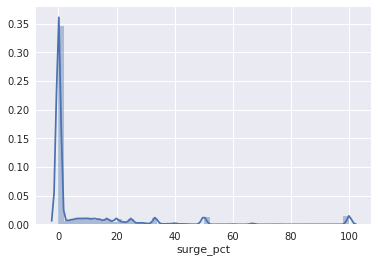

In [5]:
sns.distplot(data['surge_pct'])

Next, let us do the same for average distance metric.

/home/streetraider92/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


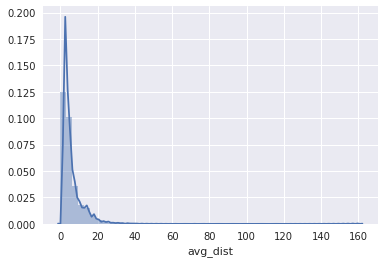

In [6]:
sns.distplot(data['avg_dist'])

Next, let us plot a bar graph to give us an idea how many people use iPhones and Android.

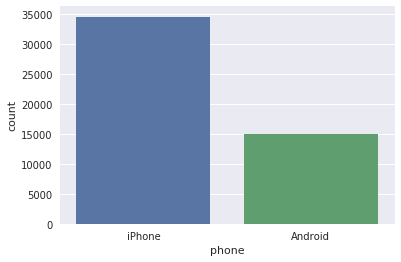

In [7]:
sns.countplot(data['phone'])

A majority of them are iPhone users.

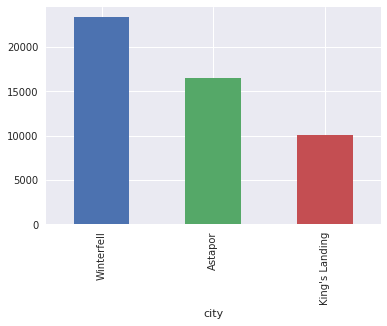

In [8]:
data.groupby(['city'])['avg_dist'].count().sort_values(ascending = False).plot(kind = 'bar')

Most number of trips happen to be in Winterfell followed by Astapor and King's Landing.

Now, let us take a look at the distribution of trips during the first 30 days.

/home/streetraider92/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


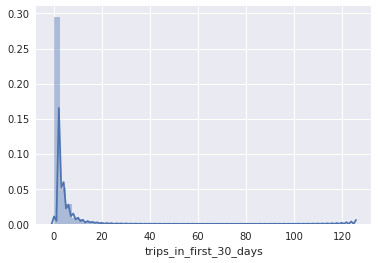

In [9]:
sns.distplot(data['trips_in_first_30_days'])

/home/streetraider92/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


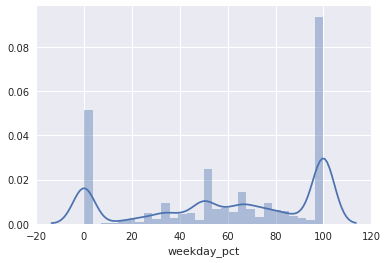

In [10]:
sns.distplot(data['weekday_pct'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We fill the missing values of the phone field with the mode, which is 'Iphone' in this case.

In [6]:
data['phone'] = data['phone'].fillna(data['phone'].mode()[0])

In [7]:
data.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2


Converting the date information fields to date_time format.

In [8]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [9]:
data['signup_date'] = pd.to_datetime(data['signup_date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


We define a new field in the dataframe that records the number of days between the signup date and the last trip date.

In [10]:
data['days since signup to last trip'] = data['last_trip_date'] - data['signup_date']

In [11]:
data['days since signup to last trip'] = data['days since signup to last trip'].apply(lambda x: x.days)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                          50000 non-null float64
avg_rating_by_driver              49799 non-null float64
avg_rating_of_driver              41878 non-null float64
avg_surge                         50000 non-null float64
city                              50000 non-null object
last_trip_date                    50000 non-null datetime64[ns]
phone                             50000 non-null object
signup_date                       50000 non-null datetime64[ns]
surge_pct                         50000 non-null float64
trips_in_first_30_days            50000 non-null int64
ultimate_black_user               50000 non-null bool
weekday_pct                       50000 non-null float64
days since signup to last trip    50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


Dropping fields that are not required for analysis.

In [13]:
data = data.drop(['last_trip_date', 'signup_date', 'ultimate_black_user'], axis = 1)

In [14]:
data.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,weekday_pct,days since signup to last trip
0,3.67,5.0,4.7,1.1,King's Landing,iPhone,15.4,4,46.2,143
1,8.26,5.0,5.0,1.0,Astapor,Android,0.0,0,50.0,96
2,0.77,5.0,4.3,1.0,Astapor,iPhone,0.0,3,100.0,1


Next, we're trying to identify customers who made trips 6 months into their subscription.

In [15]:
data['150_days_chrurn'] = data['days since signup to last trip'] >= 150

In [16]:
data = data.drop(['days since signup to last trip'], axis = 1)

Printing the head of the dataframe.

In [17]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,weekday_pct,150_days_chrurn
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,46.2,False
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,50.0,False
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,100.0,False
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,80.0,True
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,82.4,False


For information's sake, let us compute the sum of the number of retained customers into their sixth month of membership.

In [18]:
data['150_days_chrurn'].sum()

12714

In [19]:
#Importing the required modules to build a machine learning model.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import xgboost

Next, we perform one hot encoding of the city and phine columns by dropping the first column. This is to avoid the "dummy variable trap".

In [20]:
cities_cols = pd.get_dummies(data['city'], drop_first = True)

In [21]:
phone_cols = pd.get_dummies(data['phone'], drop_first = True)

In [22]:
data = data.drop(['city', 'phone'], axis = 1)

In [23]:
data_final = pd.concat([data, cities_cols, phone_cols], axis = 1)

In [24]:
data_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,150_days_chrurn,King's Landing,Winterfell,iPhone
0,3.67,5.0,4.7,1.10,15.4,4,46.2,False,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,False,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,False,0,0,1
3,2.36,4.9,4.6,1.14,20.0,9,80.0,True,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,False,0,1,0


Spltting the dataframe into X and y for training the machine learning model.

In [25]:
X = data_final.drop(['150_days_chrurn'], axis = 1)

In [26]:
y = data_final['150_days_chrurn']

The data is split 75/25.

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

Computing the number of positive test cases in our training set.

In [28]:
ytrain.sum()

9532

In [37]:
len(ytrain)

37500

In [38]:
ytest.sum()

3182

Next, we'll build a classification model using the XGBoost classifier.

In [30]:
from xgboost import XGBClassifier

In [40]:
xgb_clf = XGBClassifier(
 eta = 0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.5,
 objective = 'binary:logistic',
 colsample_bytree=0.4,
 nthread=4,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27)

In [41]:
xgb_clf.fit(Xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.4, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.5)

In [42]:
y_pred_xgb = xgb_clf.predict(Xtest)

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
accuracy_score(ytest, y_pred_xgb)

0.79744

Now, let's compute the ROC_AUC score, one of the standard metrics for measuring performance of a machine learning model.

In [44]:
roc_auc_score(ytest, xgb_clf.predict_proba(Xtest)[:,1])

0.8257199794022748

In [45]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(ytest, y_pred_xgb)

Next, let us plot the Precison vs. Recall graph.

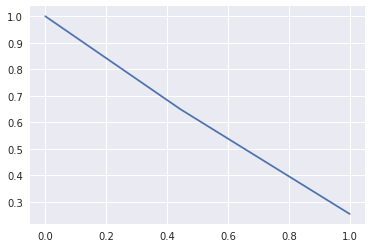

In [46]:
plt.plot(recall_rf, precision_rf)

In [47]:
print(classification_report(ytest, y_pred_xgb))

             precision    recall  f1-score   support

      False       0.83      0.92      0.87      9318
       True       0.65      0.44      0.53      3182

avg / total       0.78      0.80      0.78     12500



Now, let's fine tune the model to improve its performance

In [48]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [49]:
gsearch1 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=140, 
 gamma=0.1,
 subsample=0.8,
 objective = 'binary:logistic',
 colsample_bytree=0.8,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test1, scoring='roc_auc',iid=False, cv=5)

In [50]:
gsearch1.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [51]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82050, std: 0.00264, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.82041, std: 0.00284, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.82052, std: 0.00284, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.82353, std: 0.00261, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.82369, std: 0.00266, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.82400, std: 0.00280, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.82216, std: 0.00304, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.82178, std: 0.00200, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.82228, std: 0.00322, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.81726, std: 0.00240, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.81891, std: 0.00279, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.81934, std: 0.00281, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 5

In [52]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}

In [53]:
gsearch2 = GridSearchCV(estimator = XGBClassifier(eta = 0.1,
 n_estimators=140, 
 gamma=0.1,
 subsample=0.8,
 objective = 'binary:logistic',
 colsample_bytree=0.8,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)

In [54]:
gsearch2.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'max_depth': [4, 5, 6], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [55]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82302, std: 0.00311, params: {'max_depth': 4, 'min_child_weight': 4},
  mean: 0.82299, std: 0.00292, params: {'max_depth': 4, 'min_child_weight': 5},
  mean: 0.82286, std: 0.00311, params: {'max_depth': 4, 'min_child_weight': 6},
  mean: 0.82390, std: 0.00270, params: {'max_depth': 5, 'min_child_weight': 4},
  mean: 0.82400, std: 0.00280, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.82347, std: 0.00270, params: {'max_depth': 5, 'min_child_weight': 6},
  mean: 0.82358, std: 0.00304, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.82340, std: 0.00272, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.82362, std: 0.00248, params: {'max_depth': 6, 'min_child_weight': 6}],
 {'max_depth': 5, 'min_child_weight': 5},
 0.8239958741079777)

In [56]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

In [57]:
gsearch3 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=140, 
 subsample=0.8,
 objective = 'binary:logistic',
 max_depth = 5,
 min_child_weight = 5,
 colsample_bytree=0.8,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)

In [58]:
gsearch3.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=140,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [59]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82344, std: 0.00256, params: {'gamma': 0.0},
  mean: 0.82400, std: 0.00280, params: {'gamma': 0.1},
  mean: 0.82379, std: 0.00259, params: {'gamma': 0.2},
  mean: 0.82377, std: 0.00305, params: {'gamma': 0.3},
  mean: 0.82358, std: 0.00271, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.8239958741079777)

In [60]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

In [61]:
gsearch4 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=177, 
 gamma = 0.1,
 objective = 'binary:logistic',
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight=1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)

In [62]:
gsearch4.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=1, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=177,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=1),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [63]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82337, std: 0.00262, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.82386, std: 0.00345, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.82369, std: 0.00317, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.82384, std: 0.00261, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.82303, std: 0.00295, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.82341, std: 0.00307, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.82396, std: 0.00344, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.82402, std: 0.00273, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.82283, std: 0.00245, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.82352, std: 0.00279, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.82396, std: 0.00297, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.82419, std: 0.00283, params: {'colsample_bytree': 0.8, 'subsample'

In [64]:
param_test5 = {
 'scale_pos_weight':[i for i in range(1,5)]
}

In [65]:
gsearch5 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.9,
 subsample = 0.8,
 max_depth = 5,
 min_child_weight = 5,
 #class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test5, scoring='roc_auc',iid=False, cv=5)

In [66]:
gsearch5.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, eta=0.1, eval_metric='error', gamma=0.1,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'scale_pos_weight': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [67]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82310, std: 0.00329, params: {'scale_pos_weight': 1},
  mean: 0.82296, std: 0.00314, params: {'scale_pos_weight': 2},
  mean: 0.82302, std: 0.00324, params: {'scale_pos_weight': 3},
  mean: 0.82269, std: 0.00338, params: {'scale_pos_weight': 4}],
 {'scale_pos_weight': 1},
 0.8231031644924511)

In [68]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

In [69]:
gsearch6 = GridSearchCV(estimator = XGBClassifier( eta = 0.1,
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.8,
 subsample = 0.9,
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight = 1,
 class_weight = 'balanced',
 eval_metric = 'error',
 seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)

In [70]:
gsearch6.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [71]:
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82409, std: 0.00295, params: {'reg_alpha': 1e-05},
  mean: 0.82393, std: 0.00248, params: {'reg_alpha': 0.01},
  mean: 0.82399, std: 0.00286, params: {'reg_alpha': 0.1},
  mean: 0.82435, std: 0.00245, params: {'reg_alpha': 1},
  mean: 0.81461, std: 0.00320, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.8243526968915711)

In [87]:
param_test7 = {
 'eta':[0.1,0.01, 0.2, 0.02]
}

In [88]:
gsearch7 = GridSearchCV(estimator = XGBClassifier(
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.8,
 subsample = 0.9,
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight = 1,
 class_weight = 'balanced',
 eval_metric = 'error',
 reg_alpha = 1,
 seed=27), 
 param_grid = param_test7, scoring='roc_auc',iid=False, cv=5)

In [89]:
gsearch7.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eval_metric='error',
       gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'eta': [0.1, 0.01, 0.2, 0.02]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [90]:
gsearch7.grid_scores_, gsearch7.best_params_, gsearch7.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82435, std: 0.00245, params: {'eta': 0.1},
  mean: 0.82435, std: 0.00245, params: {'eta': 0.01},
  mean: 0.82435, std: 0.00245, params: {'eta': 0.2},
  mean: 0.82435, std: 0.00245, params: {'eta': 0.02}],
 {'eta': 0.1},
 0.8243526968915711)

In [95]:
param_test8 = {
 'base_score':[0.45,0.5, 0.55]
}

In [96]:
gsearch8 = GridSearchCV(estimator = XGBClassifier(eta = 0.1,
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.8,
 subsample = 0.9,
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight = 1,
 class_weight = 'balanced',
 eval_metric = 'error',
 reg_alpha = 1,
 seed=27), 
 param_grid = param_test8, scoring='roc_auc',iid=False, cv=5)

In [97]:
gsearch8.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.1,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'base_score': [0.45, 0.5, 0.55]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [98]:
gsearch8.grid_scores_, gsearch8.best_params_, gsearch8.best_score_

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.82464, std: 0.00268, params: {'base_score': 0.45},
  mean: 0.82435, std: 0.00245, params: {'base_score': 0.5},
  mean: 0.82450, std: 0.00288, params: {'base_score': 0.55}],
 {'base_score': 0.45},
 0.8246362896967842)

Now, let's build a model using the best parameters.

In [31]:
final_model = XGBClassifier( eta = 0.01,
 base_score = 0.45,
 n_estimators=200, 
 gamma = 0.1,
 objective = 'binary:logistic',
 colsample_bytree = 0.8,
 subsample = 0.9,
 max_depth = 5,
 min_child_weight = 5,
 scale_pos_weight = 1,
 class_weight = 'balanced',
 eval_metric = 'error',
 reg_alpha = 1,
 seed=27)

In [32]:
final_model.fit(Xtrain, ytrain)

XGBClassifier(base_score=0.45, booster='gbtree', class_weight='balanced',
       colsample_bylevel=1, colsample_bytree=0.8, eta=0.01,
       eval_metric='error', gamma=0.1, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.9)

In [33]:
y_pred = final_model.predict(Xtest)

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [34]:
accuracy_score(ytest, y_pred)

0.79872

We have an ROC_AUC score of ~0.83

In [53]:
roc_score_xgb = roc_auc_score(ytest, final_model.predict_proba(Xtest)[:,1])

In [54]:
roc_score_xgb

0.8274943375817154

In [36]:
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(ytest, y_pred)

In [63]:
prec_rec_area = auc(recall_xgb, precision_xgb)

In [64]:
prec_rec_area 

0.6233267153850067

Text(0.2,0.92,'Area under the curve is 0.62')

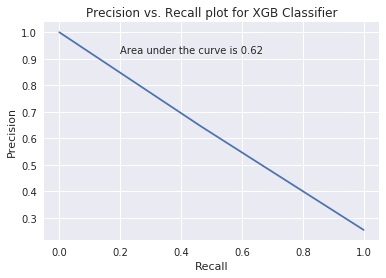

In [65]:
plt.plot(recall_xgb, precision_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall plot for XGB Classifier')
plt.annotate('Area under the curve is ' + str(round(prec_rec_area,2)), xy=(0.2, 0.92))

Area under the precision_recall curve is 0.6233

In [44]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(ytest, final_model.predict_proba(Xtest)[:,1])

Text(0.2,0.4,' ROC score is 0.83')

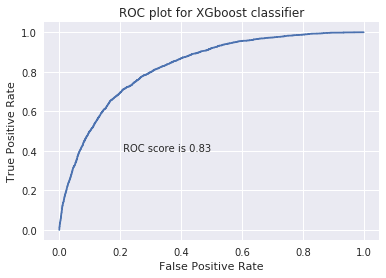

In [62]:
plt.plot(fpr_xgb, tpr_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot for XGboost classifier')
plt.annotate(' ROC score is ' + str(round(roc_score_xgb,2)), xy=(0.2, 0.4))

Next, we plot the feature importance plot for the XGboost classifier

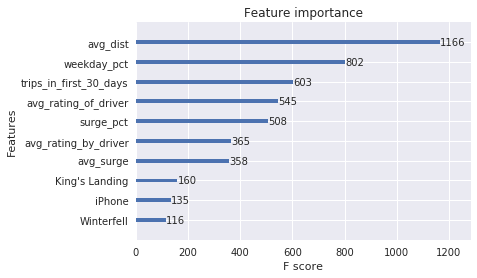

In [152]:
from xgboost import plot_importance
plot_importance(final_model)
plt.show()

We observe that metrics like avg_dist, weekday_pct, number of trips during forst 30 days and average rating of the driver are important indicators.

Next, we'll build the model using Random forests.

In [66]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
weekday_pct               50000 non-null float64
150_days_chrurn           50000 non-null bool
King's Landing            50000 non-null uint8
Winterfell                50000 non-null uint8
iPhone                    50000 non-null uint8
dtypes: bool(1), float64(6), int64(1), uint8(3)
memory usage: 2.9 MB


Random forest classifiers cannot handle missing values like XGboost. Hence, let's fill the NaN values.

In [67]:
avg_rating_by_driver = data_final['avg_rating_by_driver'].median()

In [68]:
avg_rating_by_driver 

5.0

In [69]:
data_final['avg_rating_by_driver'] =  data_final['avg_rating_by_driver'].fillna(avg_rating_by_driver)

In [70]:
avg_rating_of_driver = data_final['avg_rating_of_driver'].median()

In [71]:
avg_rating_of_driver

4.9

In [72]:
 data_final['avg_rating_of_driver'] =  data_final['avg_rating_of_driver'].fillna(avg_rating_of_driver)

In [73]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
weekday_pct               50000 non-null float64
150_days_chrurn           50000 non-null bool
King's Landing            50000 non-null uint8
Winterfell                50000 non-null uint8
iPhone                    50000 non-null uint8
dtypes: bool(1), float64(6), int64(1), uint8(3)
memory usage: 2.9 MB


### Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

/home/streetraider92/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


We will perform hyper parameter tuning with cross validation using GridearchCV to determine the best classifier.

In [106]:
n_space = np.array([50, 100, 200, 500])
criterion_vals = ['gini', 'entropy']
max_features_vals = ['auto', 'sqrt', 'log2']
max_depth_sp = [3,4,5,6]

param_grid = {'n_estimators': n_space, 'criterion' : criterion_vals, 'max_features':max_features_vals, 'max_depth': max_depth_sp}

In [76]:
clf_rf = RandomForestClassifier(random_state=42)

In [111]:
rf_clf_tuning = GridSearchCV(clf_rf, param_grid, cv=5)

In [79]:
X = data_final.drop(['150_days_chrurn'], axis = 1)

y = data_final['150_days_chrurn']

In [80]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=0.25)

In [139]:
rf_clf_tuning.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 50, 100, 200, 500]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The best parameters will be displayed below.

In [140]:
print("Tuned RF Parameters: {}".format(rf_clf_tuning.best_params_)) 
print("Best score is {}".format(rf_clf_tuning.best_score_))

Tuned RF Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}
Best score is 0.7882666666666667


In [77]:
best_rf_clf = RandomForestClassifier(random_state=42, max_depth = 6, n_estimators = 100)

In [81]:
best_rf_clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [82]:
y_best_rf_probas = best_rf_clf.predict_proba(Xtest)[:,1]

In [83]:
y_best_pred = best_rf_clf.predict(Xtest)

In [84]:
print(classification_report(ytest, y_best_pred))

             precision    recall  f1-score   support

      False       0.81      0.93      0.87      9318
       True       0.65      0.36      0.47      3182

avg / total       0.77      0.79      0.77     12500



Next, let's plot the feature importance plot.

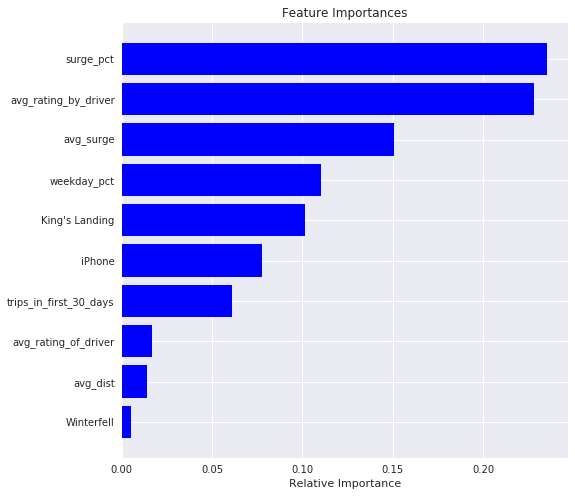

In [150]:
fig, ax = plt.subplots(figsize=(8,8))
features = X.columns
importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [85]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(ytest, y_best_rf_probas)

In [87]:
rf_prec_recall_area = auc(recall_rf, precision_rf)

In [88]:
rf_prec_recall_area

0.5883121487061427

Text(0.2,0.9,'Area under the curve is 0.59')

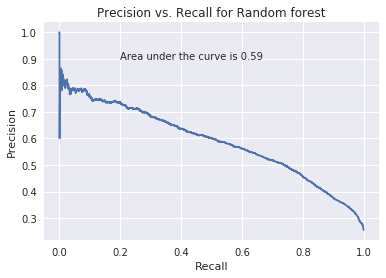

In [89]:
plt.plot(recall_rf, precision_rf)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision vs. Recall for Random forest')
plt.annotate('Area under the curve is ' + str(round(rf_prec_recall_area,2)), xy=(0.2, 0.9))

In [92]:
roc_rf_area = roc_auc_score(ytest, y_best_rf_probas)

In [93]:
roc_rf_area

0.8126750344588288

In [90]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest, best_rf_clf.predict_proba(Xtest)[:,1])

Text(0.4,0.4,'Area under the curve is 0.81')

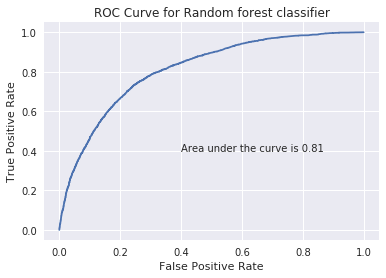

In [94]:
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random forest classifier')
plt.annotate('Area under the curve is ' + str(round(roc_rf_area,2)), xy=(0.4, 0.4))

### Model performance and conclusion

We see that XGboost performed better than Random Forest classifier. Trips during the furst 30 days is one of the most impotant features. Its possible that people who ride less during the first 30 days tend to become a 'black user'. Hence, its importnt to encourage them to do otherwise. We could introduce a complementary first trip up to 20 miles. For new users, we can introduce a 5-10% discount on the trips for the first month. We can introduce attractive offers like "Ride for 200 miles and get the next ride free for upto 25 miles". Offers are these are bound to catch the eye of new users.

Weekday percent and surge percent also seem to be high. Its possible that these two variables are correlated. A lot of people commute to and from work for the week days. Hence, it's entire possible that the users have to travel with higher surge during the peak hours. This could be one of the most terminal factors responsible for racking up the number of black users over time. While it would not be possible to cancel surges altogether, we could try decreasing the surge percent. Even a 10-15% reduction in surge during peak hours could prompt users to continue using the service.

We may not want to introduce these "offers" to everyone. Using our machine learning model, we want to focus on users who are in danger of churning. We could reach out to them with these offers through emails/notifications on their app.